In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read our data
train_data=pd.read_csv('C:/Users/Muzaffar/Desktop/Titanic Train.csv')
test_data=pd.read_csv('C:/Users/Muzaffar/Desktop/Titanic test.csv')
result_test_data=pd.read_csv('C:/Users/Muzaffar/Desktop/test result.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
result_test_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
#Now we join our result_test_data and test_data and remove 'PassengerId' because We don't use 'PassengerId' feature
test_data=pd.concat([test_data,result_test_data],axis=1)
train_data.drop(['PassengerId'],axis=1,inplace=True)
test_data.drop(['PassengerId'],axis=1,inplace=True)

In [7]:
#We join train and test data, if you don't want then you should not do
data=pd.concat([train_data,test_data],axis=0)

In [8]:
data.shape

(1309, 11)

In [9]:
data.reset_index(inplace=True)
data.head()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#remove Index column from data
data.drop(['index'],axis=1,inplace=True)

In [12]:
#here we will classification the survivors and the dead,it mean that,'Survived' column is target value.
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
#if value of Survived is 1,then it doesn't dead.Otherwise it dea.
data.query('Survived==1').shape #-->494 person is survivors

(494, 11)

In [15]:
data.query('Survived==0').shape #-->815person is dead

(815, 11)

<AxesSubplot:xlabel='Survived', ylabel='count'>

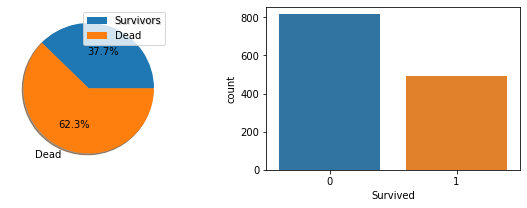

In [19]:
#Now we will visualize the survives and the dead
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.pie([494,815],labels=['Survivors','Dead'],shadow=True,autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.subplot(1,2,2)
sns.countplot(data['Survived'])

In [20]:
#next time we look at number of women and we will visualize
data.query('Sex=="female"').shape #--> Number of women:466

(466, 11)

In [21]:
#number of dead women 
data.query('Sex=="female" and Survived==0').shape #-->Number of dead women:81

(81, 11)

In [22]:
#number of survivor women 
data.query('Sex=="female" and Survived==1').shape #-->Number of survivor women:385

(385, 11)

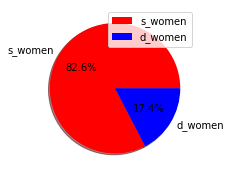

In [24]:
#visualize the women
plt.figure(figsize=(10,3))
plt.pie([385,81],labels=['s_women','d_women'],shadow=True,autopct='%1.1f%%',colors=['r','b'])
plt.legend(loc="upper right")

In [25]:
#next time we look at number of men and we will visualize
data.query('Sex=="male"').shape #--> Number of men:843

(843, 11)

In [26]:
#number of dead women 
data.query('Sex=="male" and Survived==0').shape #-->Number of dead women:734

(734, 11)

In [27]:
#number of survivor men 
data.query('Sex=="male" and Survived==1').shape #-->Number of survivor men:109

(109, 11)

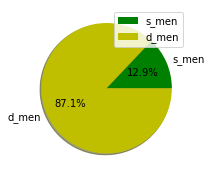

In [28]:
#visualize the women
plt.figure(figsize=(10,3))
plt.pie([109,734],labels=['s_men','d_men'],shadow=True,autopct='%1.1f%%',colors=['g','y'])
plt.legend(loc="upper right")

<AxesSubplot:xlabel='Survived', ylabel='count'>

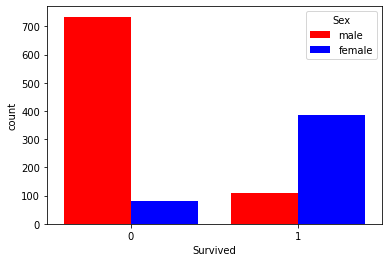

In [29]:
sns.countplot(data=data, x="Survived", hue="Sex",saturation=1,palette=['red','blue'])

# Preprocessing

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [36]:
#now we look at our None Value
data.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [37]:
#first we remove 'Cabin' featuredata.drop(['index','Name','Ticket','Cabin'],axis=1,inplace=True), there are very missing value
#the same time, we should remove 'Name','Ticket' columns
data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [40]:
#now we will fill missing value of 'Age' feature
data['Age'].mean()

29.881137667304014

In [41]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [42]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    2
dtype: int64

In [43]:
#now we fill missing values of 'Fare' and 'Embarked'
data['Embarked'].fillna(data['Embarked'].mode,inplace=True)
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

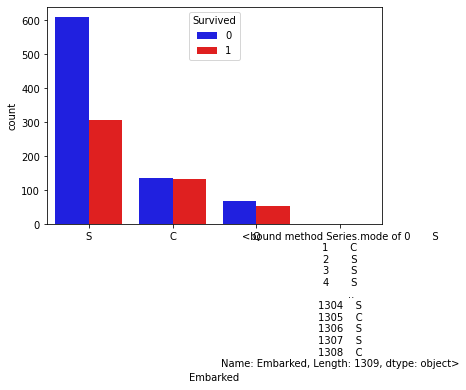

In [50]:
sns.countplot(data['Embarked'],hue=data['Survived'],palette=['b','r','g'])

In [52]:
#we creat dummy values
male_dummy=pd.get_dummies(data['Sex'],drop_first=True)

In [55]:
data=pd.concat([data,male_dummy],axis=1)

In [56]:
#now we can delete 'Sex' column
data.drop(['Sex'],1,inplace=True)

In [57]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [58]:
#Now we will create a new value and in this time we will delete 'SipSp' and 'Parch' columns
data['close_person']=data['SibSp']+data['Parch']
data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [59]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,male,close_person
0,0,3,22.0,7.2500,S,1,1
1,1,1,38.0,71.2833,C,0,1
2,1,3,26.0,7.9250,S,0,0
3,1,1,35.0,53.1000,S,0,1
4,0,3,35.0,8.0500,S,1,0


In [60]:
#now we will convert 'close_person' column from number value to boolen value
data['close_person']=pd.cut(data['close_person'],bins=[-5,0,12],labels=[0,1])

In [61]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,male,close_person
0,0,3,22.0,7.2500,S,1,1
1,1,1,38.0,71.2833,C,0,1
2,1,3,26.0,7.9250,S,0,0
3,1,1,35.0,53.1000,S,0,1
4,0,3,35.0,8.0500,S,1,0


Text(0.5, 1.0, 'survivor_person')

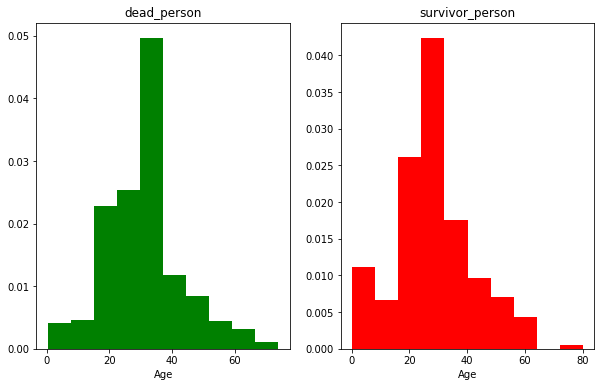

In [67]:
dead_person=data.query('Survived==0')
survivor_person=data.query('Survived==1')
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(dead_person['Age'],density=1,color='green')
plt.xlabel('Age')
plt.title('dead_person')
plt.subplot(1,2,2)
plt.hist(survivor_person['Age'],density=1,color='red')
plt.xlabel('Age')
plt.title('survivor_person')

Text(0.5, 1.0, 'survivor_person')

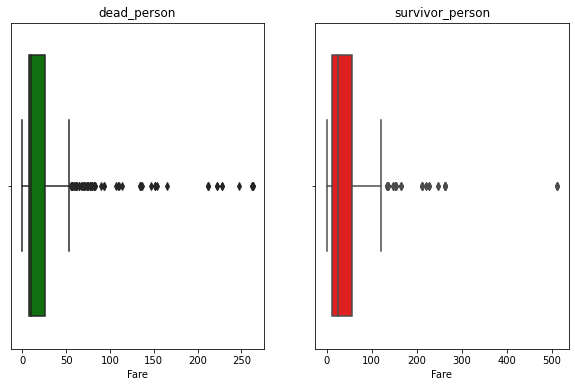

In [69]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(dead_person['Fare'],color='green')
plt.xlabel('Fare')
plt.title('dead_person')
plt.subplot(1,2,2)
sns.boxplot(survivor_person['Fare'],color='red')
plt.xlabel('Fare')
plt.title('survivor_person')

In [70]:
data.describe()

,Survived,Pclass,Age,Fare,male
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,33.295479,0.644003
std,0.484918,0.837836,12.883193,51.738879,0.478997
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.895800,0.000000
50%,0.000000,3.000000,29.881138,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.275000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


In [71]:
embarked=pd.get_dummies(data['Embarked'],drop_first=True)

In [72]:
data=pd.concat([data,embarked],1)
data.drop(['Embarked'],1,inplace=True)

In [74]:
data.head()

,Survived,Pclass,Age,Fare,male,close_person,C,Q,S
0,0,3,22.0,7.2500,1,1,0,0,1
1,1,1,38.0,71.2833,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,1
4,0,3,35.0,8.0500,1,0,0,0,1


# with train and split

In [75]:
Y=data['Survived']

In [81]:
X=data.loc[:,['Pclass','Age','Fare','male','close_person','C','Q','S']]

In [83]:
X_c=X.columns
st=StandardScaler()
st1=st.fit_transform(X)

In [84]:
X=pd.DataFrame(st1,columns=X_c)

In [85]:
X.head()

,Pclass,Age,Fare,male,close_person,C,Q,S
0,0.841916,-0.611972,-0.503595,0.743497,1.233758,-0.50977,-0.32204,0.657394
1,-1.546098,0.630431,0.734503,-1.344995,1.233758,1.96167,-0.32204,-1.521159
2,0.841916,-0.301371,-0.490544,-1.344995,-0.810532,-0.50977,-0.32204,0.657394
3,-1.546098,0.397481,0.382925,-1.344995,1.233758,-0.50977,-0.32204,0.657394
4,0.841916,0.397481,-0.488127,0.743497,-0.810532,-0.50977,-0.32204,0.657394


In [87]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [88]:
#logistic regression
model1=LogisticRegression()

In [89]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [90]:
result1=model1.predict(x_test)

In [91]:
pd.crosstab(y_test,result1)

col_0,0,1
Survived,,
0,175,22
1,28,103


In [92]:
confusion_matrix(y_test,result1)

array([[175,  22],
       [ 28, 103]], dtype=int64)

In [93]:
accuracy_score(y_test,result1)

0.8475609756097561

In [94]:
#for logistiv regression result is 85%

In [95]:
NB=GaussianNB()

In [96]:
NB.fit(X_train,Y_train)

GaussianNB()

In [98]:
result2=NB.predict(x_test)

In [99]:
pd.crosstab(y_test,result2)

col_0,0,1
Survived,,
0,164,33
1,26,105


In [100]:
accuracy_score(y_test,result2)

0.8201219512195121

In [ ]:
# for naive bayes result is 82%

# with KFold Cross-Validation

In [104]:
cv=KFold(n_splits=5,random_state=41,shuffle=True)

In [158]:
scores = []
lr_cv = LogisticRegression()
k = 5
for train_index,test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index] 
    lr_cv.fit(x_train, y_train)
    result = lr_cv.predict(x_test)
    scores.append(accuracy_score(y_test,result))

In [163]:
scores=np.array(scores)
scores

array([0.84732824, 0.86641221, 0.83969466, 0.82824427, 0.87739464])

In [162]:
scores.mean()

0.8518148050656604

In [ ]:
#if we look at, we will see our mean accuracy is 85%